In [1]:
import numpy as np 
import pylab as pl
from support import Support # Class that implements Laplace and inverse Laplace transfrom

In [2]:
buff_len=70 # Number of nodes in the squence (in the inverse Laplace transfrom (tilde{f}) of the input)
tstr_min=0.1 # Peak time of the first node in the sequence
tstr_max=2 # Peak time of the last node in the squence
k=10 # Order of the detivative in inverse Laplace transfrom, largerl k causes more narrow peaks in tilde{f}
g=1 # Determines amplitude scaling of nodes in tilde{f}: g=1->equal amplitude, g=0->power-law decay of amplitude)
Nt=2000 #Number of time points of the simulation
dt=0.001 # Time step of the simulation


input_names = ['R', 'Y', 'T'] # Names of input stimuli

inputs = []
for name in input_names:
    # Each stimulus gets a set of sequentially activated units (supported dimension) implemented through Laplace 
    # transofrm
    _ = inputs.append(Support(tstr_min, tstr_max, buff_len, k, dt, g, Nt)) # 
    
for name in input_names:
    # Initialize input vector to zero
    inputs[input_names.index(name)].value = np.zeros(Nt) 
for input_no, input_name in enumerate(input_names):
    # Add a stimulus every 300 times units
    inputs[input_names.index(input_name)].value[(input_no+1)*300] = 1

In [3]:
for time_index in range(1,Nt):
    for name in input_names:
        # At every time step present the input signal and evolve the memory reprsentation
        inputs[input_names.index(name)].update(time_index, f=inputs[input_names.index(name)].value[time_index])

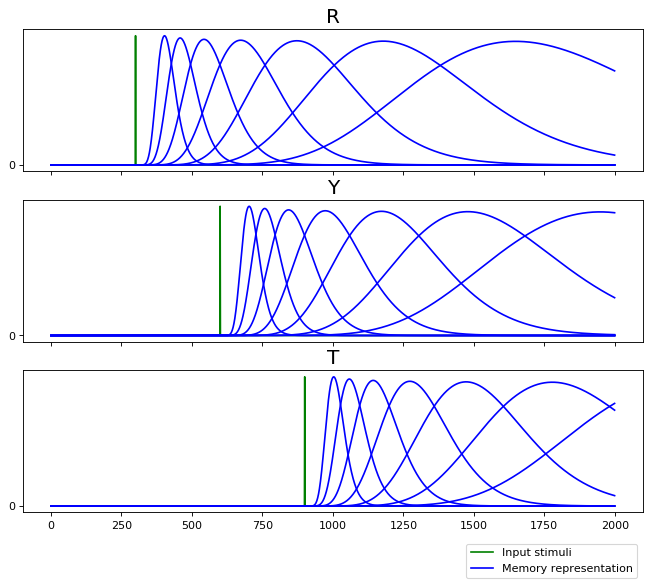

In [4]:
%matplotlib inline
pl.ion()

fig = pl.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')

for idx, name in enumerate(input_names):
    ax = pl.subplot(len(input_names), 1, idx+1)
    # Plot input
    pl.plot(inputs[input_names.index(name)].value, color='green')
    # Plot seqentially activated nodes (inverse Laplace transfrom)
    # Notice that amplitude is normalized - just for visualization
    # (Replace til_f with F to plot leaky intergrators - Laplace transfrom)
    pl.plot(inputs[input_names.index(name)].til_f[k:-k:10,:].T/
                np.max(inputs[input_names.index(name)].til_f[k:-k:10,:]), color='blue')
    ax.set_yticks(np.arange(0,1)) 
    ax.set_yticklabels([0])
    if idx < len(input_names)-1:
        ax.set_xticklabels([])  
    ax.set_title(input_names[idx], fontsize=18)
    
_ = pl.legend(['Input stimuli', 'Memory representation'], bbox_to_anchor=(1,-0.5), loc='lower right')